In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('AIML Dataset.csv')

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.shape

(6362620, 11)

In [9]:
round((df["isFraud"].value_counts()[1] / df.shape[0]) * 100,2)

0.13

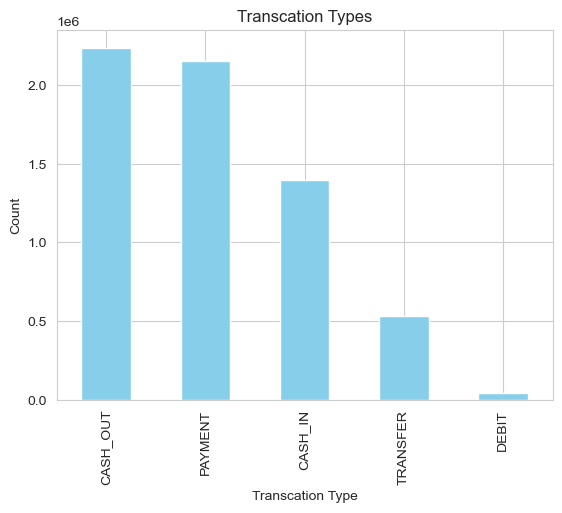

In [10]:
df["type"].value_counts().plot(kind="bar", title="Transcation Types",color = "skyblue")
plt.xlabel("Transcation Type")
plt.ylabel("Count")
plt.show()

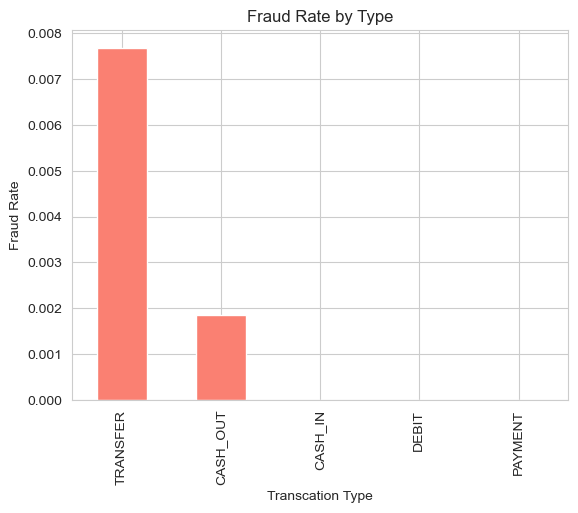

In [11]:
fraud_by_type = df.groupby(["type"])["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraud Rate by Type",color = "salmon")
plt.xlabel("Transcation Type")
plt.ylabel("Fraud Rate")
plt.show()

In [12]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

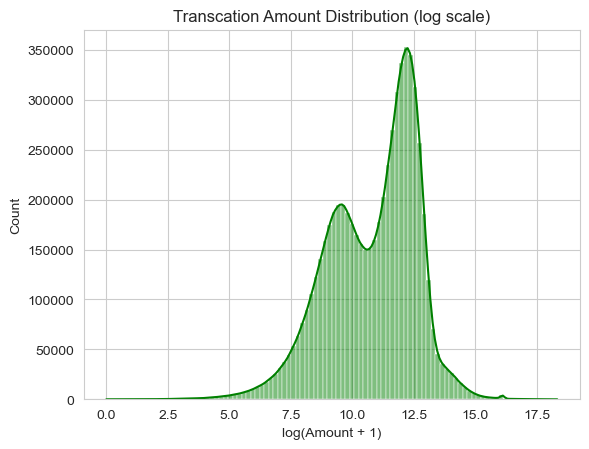

In [13]:
sns.histplot(np.log1p(df["amount"]),bins=100,kde = True,color = "green")
plt.title("Transcation Amount Distribution (log scale)")
plt.xlabel("log(Amount + 1)")
plt.show()

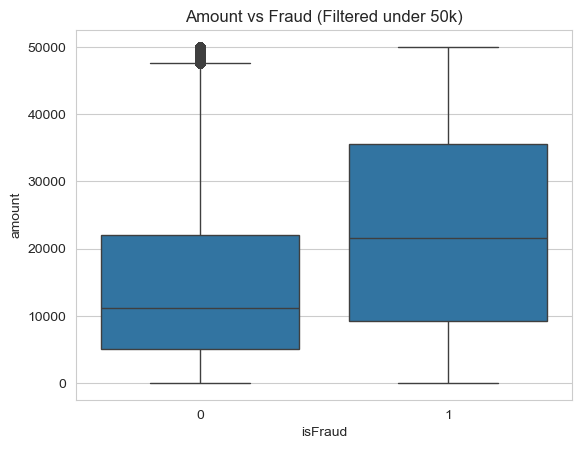

In [14]:
sns.boxplot(data = df[df["amount"] < 50000], x = "isFraud", y="amount")
plt.title("Amount vs Fraud (Filtered under 50k)")
plt.show()

In [15]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [16]:
(df["balanceDiffOrig"] < 0).sum()

1399253

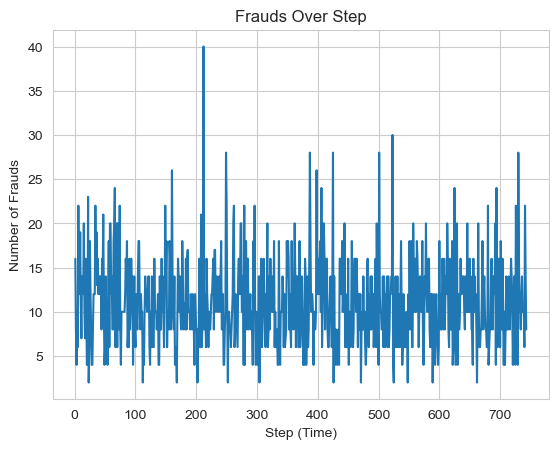

In [17]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index , frauds_per_step.values, label="Frauds per step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Step")
plt.grid(True)
plt.show()

In [18]:
df.drop(columns="step", inplace=True)

In [19]:
top_senders = df["nameOrig"].value_counts()[:10]
top_receivers = df["nameDest"].value_counts()[:10]

In [20]:
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [21]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [22]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts()[:10]

In [23]:
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [24]:
fraud_types = df[df["type"].isin(["CASH_OUT", "TRANSFER"])]

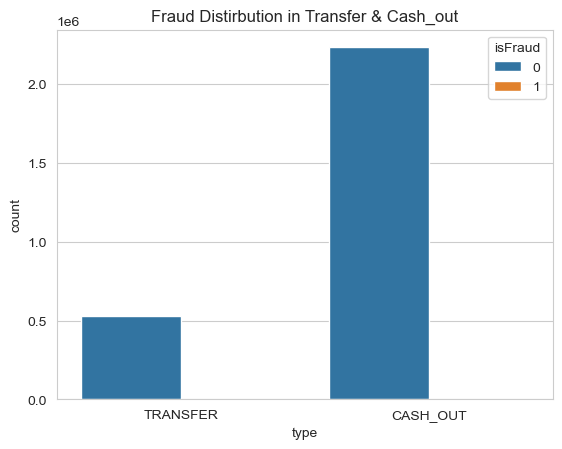

In [25]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud Distirbution in Transfer & Cash_out")
plt.show()

In [26]:
corr = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()

<function matplotlib.pyplot.show(close=None, block=None)>

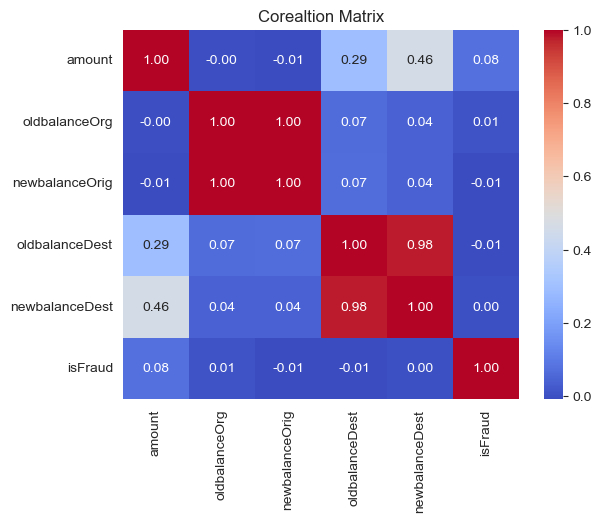

In [27]:
sns.heatmap(corr,annot=True,cmap="coolwarm", fmt= ".2f")
plt.title("Corealtion Matrix")
plt.show

In [28]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) & (df["newbalanceOrig"] == 0) & (df["type"].isin(["TRANSFER", "CASH_OUT"]))
]

In [29]:
len(zero_after_transfer)

1188074

In [30]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [31]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [33]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [34]:
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis = 1)

In [35]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [36]:
categorical = ["type"]
numeric = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [37]:
y = df_model["isFraud"]
X = df_model.drop("isFraud",axis = 1)

In [38]:
not_nan_indices = y.dropna().index


X_clean = X.loc[not_nan_indices]
y_clean = y.loc[not_nan_indices]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean,
    y_clean,
    test_size=0.3,
    stratify=y_clean,
    random_state=42
)

In [39]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop = "first"), categorical)
    ],
    remainder = "drop"
)

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(class_weight="balanced", max_iter=1000))

])

In [41]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [42]:
y_pred = pipeline.predict(X_test)

In [43]:
pipeline.score(X_test,y_test) * 100

94.67462565211606

In [44]:
import joblib

joblib.dump(pipeline,"fraud_detection_model_pipeline.pkl")

['fraud_detection_model_pipeline.pkl']